In [1]:
from DataParser import DataParser
import numpy as np
import scipy.sparse as sps

from Data_manager.split_functions.split_train_validation_random_holdout import \
split_train_in_two_percentage_global_sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from SimpleEvaluator import evaluator
from Base.Evaluation.Evaluator import EvaluatorHoldout

In [2]:
from Base.NonPersonalizedRecommender import TopPop, Random
from Hybrid.HybridCombinationSearch import HybridCombinationMergedSearch,HybridCombinationSearch
from KNN.ItemKNNCBFRecommender import ItemKNNCBFRecommender
from KNN.UserKNNCFRecommender import UserKNNCFRecommender
from KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from MatrixFactorization.IALSRecommender import IALSRecommender
from SLIM_BPR.Cython.SLIM_BPR_Cython import SLIM_BPR_Cython
from SLIM_ElasticNet.SLIMElasticNetRecommender import SLIMElasticNetRecommender
from GraphBased.P3alphaRecommender import P3alphaRecommender
from GraphBased.RP3betaRecommender import RP3betaRecommender
from MatrixFactorization.Cython.MatrixFactorization_Cython import MatrixFactorization_BPR_Cython, MatrixFactorization_FunkSVD_Cython
from MatrixFactorization.PureSVDRecommender import PureSVDRecommender, PureSVDItemRecommender
from MatrixFactorization.NMFRecommender import NMFRecommender

In [3]:
seed = 1205
parser = DataParser()

URM_all = parser.get_URM_all()
ICM_all = parser.get_ICM_all()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage=0.9, seed=seed)

In [4]:
rp3b = RP3betaRecommender(URM_train, verbose=False)
rp3b_params = {'topK': 1000, 'alpha': 0.38192761611274967, 'beta': 0.0, 'normalize_similarity': False}
try:
    rp3b.load_model(f'stored_recommenders/seed_{str(seed)}_{rp3b.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{rp3b.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {rp3b.RECOMMENDER_NAME} ...")
    rp3b.fit(**rp3b_params)
    print(f"done.")
    rp3b.save_model(f'stored_recommenders/seed_{str(seed)}_{rp3b.RECOMMENDER_NAME}/','for_notebook_analysis')

p3a = P3alphaRecommender(URM_train, verbose=False)
p3a_params = {'topK': 131, 'alpha': 0.33660811631883863, 'normalize_similarity': False}
try:
    p3a.load_model(f'stored_recommenders/seed_{str(seed)}_{p3a.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{p3a.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {p3a.RECOMMENDER_NAME} ...")
    p3a.fit(**p3a_params)
    print(f"done.")
    p3a.save_model(f'stored_recommenders/seed_{str(seed)}_{p3a.RECOMMENDER_NAME}/','for_notebook_analysis')


icf = ItemKNNCFRecommender(URM_train, verbose=False)
icf_params = {'topK': 55, 'shrink': 1000, 'similarity': 'asymmetric', 'normalize': True, 'asymmetric_alpha': 0.0}
try:
    icf.load_model(f'stored_recommenders/seed_{str(seed)}_{icf.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{icf.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {icf.RECOMMENDER_NAME} ...")
    icf.fit(**icf_params)
    print(f"done.")
    icf.save_model(f'stored_recommenders/seed_{str(seed)}_{icf.RECOMMENDER_NAME}/','for_notebook_analysis')
    
ucf = UserKNNCFRecommender(URM_train, verbose=False)
ucf_params = {'topK': 190, 'shrink': 0, 'similarity': 'cosine', 'normalize': True}
try:
    ucf.load_model(f'stored_recommenders/seed_{str(seed)}_{ucf.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{ucf.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {ucf.RECOMMENDER_NAME} ...")
    ucf.fit(**ucf_params)
    print(f"done.")
    ucf.save_model(f'stored_recommenders/seed_{str(seed)}_{ucf.RECOMMENDER_NAME}/','for_notebook_analysis')

icb = ItemKNNCBFRecommender(URM_train, ICM_all, verbose=False)
icb_params = {'topK': 65, 'shrink': 0, 'similarity': 'dice', 'normalize': True}
try:
    icb.load_model(f'stored_recommenders/seed_{str(seed)}_{icb.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{icb.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {icb.RECOMMENDER_NAME} ...")
    icb.fit(**icb_params)
    print(f"done.")
    icb.save_model(f'stored_recommenders/seed_{str(seed)}_{icb.RECOMMENDER_NAME}/','for_notebook_analysis')

sen = SLIMElasticNetRecommender(URM_train, verbose=False)
sen_params = {'topK': 992, 'l1_ratio': 0.004065081925341167, 'alpha': 0.003725005053334143}
try:
    sen.load_model(f'stored_recommenders/seed_{str(seed)}_{sen.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{sen.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {sen.RECOMMENDER_NAME} ...")
    sen.fit(**sen_params)
    print(f"done.")
    sen.save_model(f'stored_recommenders/seed_{str(seed)}_{sen.RECOMMENDER_NAME}/','for_notebook_analysis')

sbpr = SLIM_BPR_Cython(URM_train, verbose=False)
sbpr_params = {'topK': 979, 'epochs': 130, 'symmetric': False, 'sgd_mode': 'adam', 'lambda_i': 0.004947329669424629, 'lambda_j': 1.1534760845071758e-05, 'learning_rate': 0.0001}
try:
    sbpr.load_model(f'stored_recommenders/seed_{str(seed)}_{sbpr.RECOMMENDER_NAME}/','for_notebook_analysis')
    print(f"{sbpr.RECOMMENDER_NAME} loaded.")
except:
    print(f"Fitting {sbpr.RECOMMENDER_NAME} ...")
    sbpr.fit(**sbpr_params)
    print(f"done.")
    sbpr.save_model(f'stored_recommenders/seed_{str(seed)}_{sbpr.RECOMMENDER_NAME}/','for_notebook_analysis')


RP3betaRecommender loaded.
P3alphaRecommender loaded.
ItemKNNCFRecommender loaded.
UserKNNCFRecommender loaded.
ItemKNNCBFRecommender loaded.
SLIMElasticNetRecommender loaded.
SLIM_BPR_Recommender loaded.


### MERGED COMBO

In [5]:
merged_labels={
    'merged1': 'icb_icf_p3a',
    'merged2': 'icb_icf_rp3b',
    'merged3': 'icb_icf_sen',
    'merged4': 'icb_p3a_rp3b',
    'merged5': 'icb_p3a_sen',
    'merged6': 'icb_rp3b_sen',
    'merged7': 'icf_p3a_rp3b',
    'merged8': 'p3a_rp3b_sen',
}#8 e 9 sono P3a e Rp3b singoli! --> 10 => 8

In [6]:
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

In [7]:
list_recommender = [icb, icf, p3a]
merged1 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9004575733942728, 'l1_ratio': 0.26510663025884135, 'topK': 888}
merged1.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged1)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 2.82 sec. Users per second: 1455


0.07330344697863617

In [8]:
list_recommender = [icb, icf, rp3b]
merged2 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6299182764826382, 'l1_ratio': 0.9675762628242017, 'topK': 864}
merged2.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged2)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.23 sec. Users per second: 1271


0.07380063236981378

In [9]:
list_recommender = [icb, icf, sen]
merged3 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3791657333411357, 'l1_ratio': 0.23126551664267164, 'topK': 990}
merged3.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged3)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.16 sec. Users per second: 1300


0.07392929945110398

In [10]:
list_recommender = [icb, p3a, rp3b]
merged4 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6299182764826382, 'l1_ratio': 0.9675762628242017, 'topK': 864}
merged4.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged4)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.46 sec. Users per second: 1187


0.07359655012354013

In [11]:
list_recommender = [icb, p3a, sen]
merged5 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9712321721669441, 'l1_ratio': 0.6879306727642494, 'topK': 990}
merged5.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged5)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.42 sec. Users per second: 1201


0.07336524156802389

In [12]:
list_recommender = [icb, rp3b, sen]
merged6 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6355738550417837, 'l1_ratio': 0.6617849709204384, 'topK': 538}
merged6.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged6)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.26 sec. Users per second: 1259


0.07425687603341367

In [13]:
list_recommender = [icf, p3a, rp3b]
merged7 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params = {'alpha': 0.44112400857241485, 'l1_ratio': 0.4636970676140909, 'topK': 489}
merged7.fit(**params)
result, _ = evaluator_test.evaluateRecommender(merged7)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 2.99 sec. Users per second: 1373


0.06444040946690227

In [16]:
list_recommender = [p3a, rp3b, sen]
merged8 = HybridCombinationMergedSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8589000153868548, 'l1_ratio': 0.4263692698842382, 'topK': 636}
merged8.fit(**params)
result,_ = evaluator_test.evaluateRecommender(merged8)
result[10]['MAP']

HybridCombinationMergedSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationMergedSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.02 sec. Users per second: 1358


0.06504461812056087

---
## linear combo

In [51]:
combo_labels ={
    'combo1': 'p3a_icf_ucf',
    'combo2': 'rp3b_icf_ucf',
    'combo3': 'rp3b_p3a_icf',
    'combo4': 'rp3b_p3a_ucf', 
    'combo5': 'icf_icb_sen',
    'combo6': 'icf_sen_sbpr',
    'combo7': 'icf_ucf_icb',
    'combo8': 'icf_ucf_sen',
    'combo9': 'p3a_icb_sen',
    'combo10': 'p3a_icf_icb',
    'combo11': 'p3a_icf_sen',
    'combo12': 'p3a_sen_sbpr',
    'combo13': 'p3a_ucf_icb',
    'combo14': 'p3a_ucf_sen',
    'combo15': 'rp3b_icb_sen',
    'combo16': 'rp3b_icf_icb',
    'combo17': 'rp3b_icf_sen',
    'combo18': 'rp3b_p3a_icb',
    'combo19': 'rp3b_sen_sbpr',
    'combo20': 'rp3b_ucf_icb',
    'combo21': 'rp3b_ucf_sen',
    'combo22': 'ucf_icb_sen',
    'combo23': 'ucf_sen_sbpr',
    'combo24': 'icb_sen_sbpr',
    'combo25': 'icf_icb_sbpr',
    'combo26': 'p3a_icb_sbpr',
    'combo27': 'rp3b_icb_sbpr',
    'combo28': 'ucf_icb_sbpr',
}

In [17]:
list_recommender = [p3a, icf, ucf]
combo1 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.5630173292967398, 'l1_ratio': 0.92733589638295}
combo1.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo1)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.83 sec. Users per second: 1073


0.06492509475376437

In [18]:
list_recommender = [rp3b, icf, ucf]
combo2 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7416313012430469, 'l1_ratio': 0.8122593875086325}
combo2.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo2)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.11 sec. Users per second: 1000


0.06423070706922872

In [19]:
list_recommender = [rp3b, p3a, icf]
combo3 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.367698407319822, 'l1_ratio': 0.5878133798647788}
combo3.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo3)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.03 sec. Users per second: 1018


0.06493208093975254

In [20]:
list_recommender = [rp3b, p3a, ucf]
combo4 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6405838432360388, 'l1_ratio': 0.4188312253799342}
combo4.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo4)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.89 sec. Users per second: 1056


0.06480067672691545

In [21]:
list_recommender = [icf, icb, sen]
combo5 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.21686976560272436, 'l1_ratio': 0.4598014054291886}
combo5.fit(**params)
result = evaluator(combo5, URM_test, cutoff=10)
result, _ = evaluator_test.evaluateRecommender(combo5)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.89 sec. Users per second: 1055


0.0734446326879147

In [22]:
list_recommender = [icf, sen, sbpr]
combo6 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6342517822083686, 'l1_ratio': 0.38051846734018036}
combo6.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo6)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.55 sec. Users per second: 902


0.0659347425039182

In [23]:
list_recommender = [icf, ucf, icb]
combo7 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6094266148134767, 'l1_ratio': 0.46668601356447076}
combo7.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo7)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.86 sec. Users per second: 1064


0.07326053284422848

In [24]:
list_recommender = [icf, ucf, sen]
combo8 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8356363650152253, 'l1_ratio': 0.9163620505237737}
combo8.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo8)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.07 sec. Users per second: 1008


0.0654504737120623

In [25]:
list_recommender = [p3a, icb, sen]
combo9 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9999772418587548, 'l1_ratio': 0.28511052552468436}
combo9.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo9)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.02 sec. Users per second: 1021


0.07332406033664196

In [26]:
list_recommender = [p3a, icf, icb]
combo10 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4878994539449091, 'l1_ratio': 0.4667353090819475}
combo10.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo10)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.65 sec. Users per second: 1124


0.07373877822087309

In [27]:
list_recommender = [p3a, icf, sen]
combo11 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 1.0}
combo11.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo11)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.73 sec. Users per second: 1102


0.06369466104485845

In [28]:
list_recommender = [p3a, sen, sbpr]
combo12 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 1.0}
combo12.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo12)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.42 sec. Users per second: 928


0.06369466104485845

In [29]:
list_recommender = [p3a, ucf, icb]
combo13 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3987236515679141, 'l1_ratio': 0.15489605895390016}
combo13.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo13)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 3.67 sec. Users per second: 1119


0.07431038985067778

In [30]:
list_recommender = [p3a, ucf, sen]
combo14 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.626160652050037, 'l1_ratio': 0.5469215188707677}
combo14.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo14)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.02 sec. Users per second: 1021


0.06505141500458302

In [31]:
list_recommender = [rp3b, icb, sen]
combo15 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 1.0, 'l1_ratio': 0.3951763029766836}
combo15.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo15)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.10 sec. Users per second: 1001


0.07304859027102016

In [32]:
list_recommender = [rp3b, icf, icb]
combo16 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4577946628581237, 'l1_ratio': 0.7434539743766688}
combo16.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo16)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.05 sec. Users per second: 1014


0.07358748418546207

In [33]:
list_recommender = [rp3b, icf, sen]
combo17 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.8999667813934427, 'l1_ratio': 0.3877035588220962}
combo17.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo17)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.18 sec. Users per second: 982


0.06415133493322638

In [34]:
list_recommender = [rp3b, p3a, icb]
combo18 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3619673282977996, 'l1_ratio': 0.997620008978927}
combo18.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo18)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.17 sec. Users per second: 985


0.0737694602497779

In [35]:
list_recommender = [rp3b, sen, sbpr]
combo19 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.45684305746620557, 'l1_ratio': 0.6484637757274762}
combo19.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo19)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.76 sec. Users per second: 863


0.06407493371823297

In [36]:
list_recommender = [rp3b, ucf, icb]
combo20 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.3787194374490951, 'l1_ratio': 0.706212775218188}
combo20.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo20)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.07 sec. Users per second: 1009


0.07480431772165834

In [37]:
list_recommender = [rp3b, ucf, sen]
combo21 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.4629787518361874, 'l1_ratio': 0.7137640115869015}
combo21.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo21)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.20 sec. Users per second: 979


0.06452282519960771

In [38]:
list_recommender = [ucf, icb, sen]
combo22 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.33535858857401674, 'l1_ratio': 0.4046400351885727}
combo22.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo22)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.09 sec. Users per second: 1003


0.07640480816408736

In [39]:
list_recommender = [ucf, sen, sbpr]
combo23 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7231977321772529, 'l1_ratio': 0.09639275029166919}
combo23.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo23)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.45 sec. Users per second: 924


0.06590664228383698

In [40]:
list_recommender = [icb, sen, sbpr]
combo24 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7321778261479165, 'l1_ratio': 0.15333729621089734}
combo24.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo24)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.68 sec. Users per second: 877


0.07448891023368259

In [41]:
list_recommender = [icf, icb, sbpr]
combo25 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.1452330659544545, 'l1_ratio': 0.505309437774802}
combo25.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo25)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.32 sec. Users per second: 950


0.07044918717969761

In [42]:
list_recommender = [p3a, icb, sbpr]
combo26 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.6336877202461957, 'l1_ratio': 0.2923784696799847}
combo26.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo26)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.26 sec. Users per second: 963


0.07350138504148736

In [43]:
list_recommender = [rp3b, icb, sbpr]
combo27 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.9902553208856146, 'l1_ratio': 0.36299727894312356}
combo27.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo27)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.64 sec. Users per second: 885


0.07342295251208303

In [44]:
list_recommender = [ucf, icb, sbpr]
combo28 = HybridCombinationSearch(URM_train, ICM_all, list_recommender)
params={'alpha': 0.7647242911516163, 'l1_ratio': 0.4701015482243481}
combo28.fit(**params)
result, _ = evaluator_test.evaluateRecommender(combo28)
result[10]['MAP']

HybridCombinationSearch: URM Detected 27 (0.34 %) cold users.
HybridCombinationSearch: URM Detected 1634 (6.29 %) cold items.
EvaluatorHoldout: Processed 4106 ( 100.00% ) in 4.39 sec. Users per second: 936


0.07367557149864672

---
### USER WISE PLOTS

In [45]:
merged_hybrid = [merged1, merged2, merged3, merged4, merged5, merged6, merged7, merged8]
combo_hybrid = [combo1, combo2, combo3, combo4, combo5, combo6, combo7, combo8, combo9, combo10,
                combo11, combo12, combo13, combo14, combo15, combo16, combo17, combo18, combo19, combo20,
                combo21, combo22, combo23, combo24, combo25, combo26, combo27, combo28]

In [46]:
num_merged = 8
num_combo = 28

In [68]:
f_ranges = [
    (0,3),
    (3,5),
    (5,10),
    (10,17),
    (17,30),
    (30,100),
    (100,200),
    (200,-1)
]
MAP_merged_per_group = []
MAP_combo_per_group = []
cutoff = 10

for f_range in f_ranges:
    URM_test_group = parser.filter_URM_test_by_range(URM_train, URM_test, f_range)
    evaluator_test = EvaluatorHoldout(URM_test_group, cutoff_list=[cutoff])
    
    merged_dict={}
    for i in range (num_merged):
        results, _ = evaluator_test.evaluateRecommender(merged_hybrid[i])
        key='merged'+str(i+1)
        merged_dict[key]=results[cutoff]["MAP"]
    
    MAP_merged_per_group.append(merged_dict)
 
    combo_dict={}
    for i in range (num_combo):
        results, _ = evaluator_test.evaluateRecommender(combo_hybrid[i])
        key='combo'+str(i+1)
        combo_dict[key]=results[cutoff]["MAP"]
    
    MAP_combo_per_group.append(combo_dict)

EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.38 sec. Users per second: 1485
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.39 sec. Users per second: 1468
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.43 sec. Users per second: 1310
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.38 sec. Users per second: 1509
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.35 sec. Users per second: 1602
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.35 sec. Users per second: 1621
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.34 sec. Users per second: 1663
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.34 sec. Users per second: 1652
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.34 sec. Users per second: 1653
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.35 sec. Users per second: 1633
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.34 sec. Users per second: 1646
EvaluatorHoldout: Processed 566 ( 100.00% ) in 0.35 sec. Users per second: 1625
EvaluatorHoldout: Processed 566 ( 100.00

EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.96 sec. Users per second: 1067
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.97 sec. Users per second: 1054
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.91 sec. Users per second: 1128
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.96 sec. Users per second: 1075
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.99 sec. Users per second: 1036
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.96 sec. Users per second: 1074
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.98 sec. Users per second: 1047
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 1.01 sec. Users per second: 1020
EvaluatorHoldout: Processed 1027 ( 100.00% ) in 0.92 sec. Users per second: 1111
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.52 sec. Users per second: 1300
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.55 sec. Users per second: 1236
EvaluatorHoldout: Processed 676 ( 100.00% ) in 0.52 sec. Users per second: 1312
EvaluatorHoldout: Processed 676

EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.49 sec. Users per second: 1055
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.67 sec. Users per second: 777
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.45 sec. Users per second: 1164
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.53 sec. Users per second: 984
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.63 sec. Users per second: 825
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.59 sec. Users per second: 887
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.62 sec. Users per second: 844
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.58 sec. Users per second: 903
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.83 sec. Users per second: 629
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.58 sec. Users per second: 898
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.62 sec. Users per second: 839
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.54 sec. Users per second: 976
EvaluatorHoldout: Processed 522 ( 100.00% ) in 0.7

In [69]:
def check_if_present(key_list, el):
    for key_val, combo_val in key_list:
        if key_val == el[0] and combo_val == el[1]:
            return True
    return False

In [70]:
to_be_plotted = []
for i in range(0, len (f_ranges)):
    print(f"RANGE {f_ranges[i]}")
    maxp = 0
    difference = 0
    old_name = ''
    max_name=''
    max_isCombo=None
    old_isCombo=None
    max_key=None
    old_key=None
    
    combo_dict = MAP_combo_per_group[i]
    for key in combo_dict:
        value = combo_dict[key]
        print(f"> MAP combo-{combo_labels[key]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=combo_labels[key]
            max_isCombo=True
            old_key=max_key
            max_key=key
   
    merged_dict = MAP_merged_per_group[i]
    for key in merged_dict:
        value = merged_dict[key]
        print(f"> MAP merged-{merged_labels[key]}:\t {value}")
        if value > maxp:
            difference=value - maxp
            maxp=value
            old_name=max_name
            old_isCombo=max_isCombo
            max_name=merged_labels[key]
            max_isCombo=False
            old_key=max_key
            max_key=key
            
    if not check_if_present(to_be_plotted, (max_key, max_isCombo)):
        to_be_plotted.append((max_key, max_isCombo))
    
    if not old_key is None and not check_if_present(to_be_plotted, (old_key, old_isCombo)):
        to_be_plotted.append((old_key, old_isCombo))
    
    
    print(f"Max MAP is {maxp} from {max_name}({'COMBO' if max_isCombo else 'MERGED'}) with difference from previous max of {difference} from {old_name}({'COMBO' if old_isCombo else 'MERGED'}) \n")
        

RANGE (0, 3)
> MAP combo-p3a_icf_ucf:	 0.06855719614111841
> MAP combo-rp3b_icf_ucf:	 0.06926426047450783
> MAP combo-rp3b_p3a_icf:	 0.06871038757081162
> MAP combo-rp3b_p3a_ucf:	 0.06712834427057043
> MAP combo-icf_icb_sen:	 0.07349753211060633
> MAP combo-icf_sen_sbpr:	 0.06371326210107131
> MAP combo-icf_ucf_icb:	 0.07813779516518034
> MAP combo-icf_ucf_sen:	 0.06864974199338159
> MAP combo-p3a_icb_sen:	 0.07950810477312246
> MAP combo-p3a_icf_icb:	 0.08091872791519436
> MAP combo-p3a_icf_sen:	 0.06497349823321558
> MAP combo-p3a_sen_sbpr:	 0.06497349823321558
> MAP combo-p3a_ucf_icb:	 0.08080655112457232
> MAP combo-p3a_ucf_sen:	 0.06691310505356443
> MAP combo-rp3b_icb_sen:	 0.081013026529811
> MAP combo-rp3b_icf_icb:	 0.08363866453530765
> MAP combo-rp3b_icf_sen:	 0.06913876268999945
> MAP combo-rp3b_p3a_icb:	 0.08225152840877224
> MAP combo-rp3b_sen_sbpr:	 0.06809481743227326
> MAP combo-rp3b_ucf_icb:	 0.08202542206517474
> MAP combo-rp3b_ucf_sen:	 0.06809481743227327
> MAP comb

In [71]:
to_be_plotted

[('combo16', True),
 ('combo15', True),
 ('combo13', True),
 ('combo7', True),
 ('merged6', False),
 ('merged2', False),
 ('combo9', True),
 ('combo5', True),
 ('combo2', True),
 ('merged3', False),
 ('combo22', True),
 ('combo4', True)]

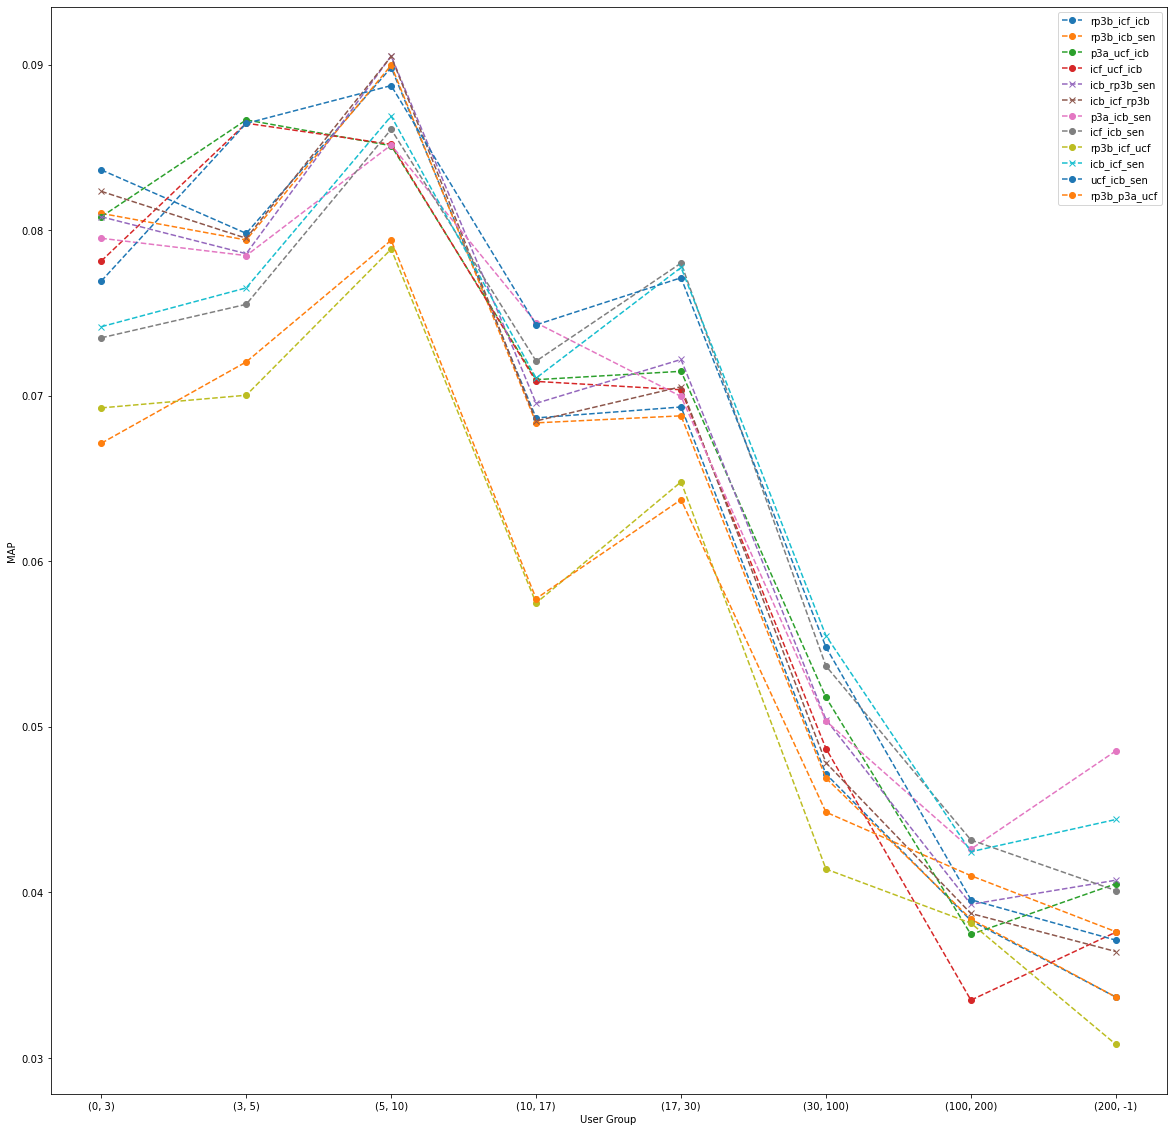

In [72]:
import matplotlib.pyplot as pyplot
%matplotlib inline  
pyplot.figure(figsize=(20,20))
for key, isCombo in to_be_plotted:
    l=[]
    if isCombo:
        for combo_dict in MAP_combo_per_group:
            l.append(combo_dict[key])
        style = '--o'
        label = combo_labels[key]
    else:
        for merged_dict in MAP_merged_per_group:
            l.append(merged_dict[key])
        style = '--x'
        label = merged_labels[key]
    pyplot.plot(l, style, label = label)

pyplot.xticks(ticks=range(0,len(f_ranges)), labels=f_ranges)
pyplot.ylabel('MAP')
pyplot.xlabel('User Group')
pyplot.legend()
pyplot.show()